![](../../images/header.png)

# Correlation Function
<h6>
Authors: Tanveer Karim, Simon Bouchard

Inspired by a similar work from Arnaud De Mattia

Last Updated: October 1, 2025
</h6>

In this notebook, we will use a more down-to-Earth (literally) data to understand the often-used **two-point correlation function** (2PCF) in cosmology. 

By the end of this notebook, you should be able to:
- Understand the concept of the two-point correlation function (2PCF)
- Plot angular data
- Measure the 2PCF from a given dataset
- Explain qualitatively what the 2PCF may indicate about the data

## Preferred Backgrounds
While not necessary, having knowledge about the following topics will be helpful in completing this notebook on time:
- How Jupyter cells work
- Basic understanding of mathematical functions
- What histograms represent
- How to measure Euclidean distances (or Pythagorean theorem)

In [100]:
# Run this cell to load the basic Python packages we need to run this notebook
import time
import numpy as np
import matplotlib.pyplot as plt
from desihigh.tpcf import load_subway_data, generate_randoms, geo_to_cartesian, pair_count_2d

## 1 - Little dots everywhere

Imagine someone gives you the following set of data points. It could be perhaps a map of subway station locations in a city.

Let's call this dataset A.

```
.        .     .            .         .

     .         .    .         .      .

.     .       .                 .     .
```

Now, someone else gives you another set of data points. Let's call it B.

```
. .    .       . . .         .    .
.     .  .       .     .      .   .
      . . .           . .      . .
. .          .  .    .  . .      . . .
```

Before we jump into any crazy mathematics, let's take a moment to think about how these two distributions look like.

***Discussion**: Discuss with your neighbors what are the similarities and dissimilarities between the two cities. In particular,*
- *What feels distinctive for each of them?*
- *If you are at a station in City A, how likely do you have to travel before you end up in the next station? What about if you were in City B?*

### 1.1 - Structure from dots

So you may have noticed that the stations in City A are more spread out than the stations in B. We can tell this easily because we can plot these few points and look at them by eye. But, (astro)physics (or any natural sciences) is all about *precise* and *quantitative* statements. We want to somehow convert our qualitative intuition into something that can be calculated. 

#### Why we may want to do this? 

Perhaps someone asks us: *What is the best distance to place new stations?* or *How congested are stations in City A compared to City B?*

To achieve this goal, we will need to use some clever mathematical tools that turns this seemingly qualitative geometric problem into something that is more quantitative.

### 1.2 - Data from real world

Before we see how these tools work, let's actually use real-world data! 

In [101]:
data_london = load_subway_data('London')
data_boston = load_subway_data('Boston')

Now we have two arrays, `data_boston` and `data_london`, that have two columns. The first and the second columns are longitude and latitude respectively. And the number of rows corresponds to the number of stations. 

First, let's figure out how many stations are in each city. **Print out the shape of these arrays by typing `print(array_name.shape)` in the cell below**. If the number $2$ represents the number of columns, then what does the other number represent? How many stations are there in each city? 

In [102]:
# your work here 

##FIXME: soln to be removed
print(data_boston.shape)
print(data_london.shape)

(268, 2)
(308, 2)


### 1.3 - Visualizing the stations

Unless you are a magician with a powerful visualization, it might be difficult to simply look at these arrays and see how the stations are distributed. **Print out the arrays by typing `print(array_name)` in the following cell.**

In [103]:
# your code here

So what can be a better approach? Well since we know the latitude and the longitude, why not simply plot those values using the power of Python! 

First, **isolate the longitude and latitude values into separate arrays**. We can do this by typing `data_boston[:,your_value]` where `your_value` is the column number. So if longitude corresponds to the 1st column, you should type `0` for `your_value`. (Remember that Python starts from 0, not 1 so we use 0 to represent 1st, and so on and so forth). 

In [104]:
# long_boston = ...
# lat_boston = ...

# long_london = ...
# lat_london = ...

#FIXME: soln to be removed
long_boston = data_boston[:,0]
lat_boston = data_boston[:,1]

long_london = data_london[:,0]
lat_london = data_london[:,1]

**Now use `plt.scatter(x,y)` and plot our subway locations!** 

Let's first start with Boston. 

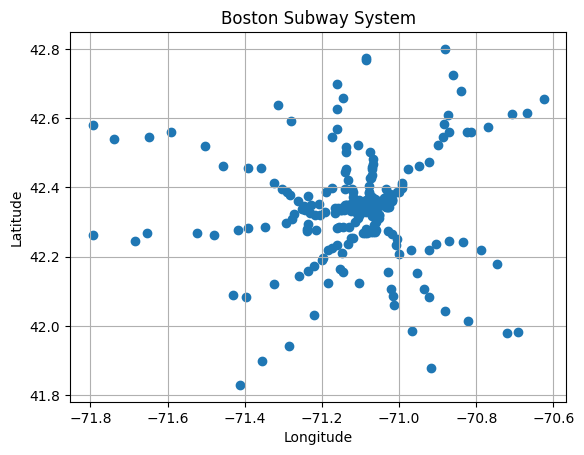

In [105]:
# plt.scatter(...)

# FIXME: soln to be removed
plt.scatter(long_boston , lat_boston)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Boston Subway System")
plt.grid(True)

We are starting to see *some* structure but if you are not familiar with Boston (even if you are familiar), you may be confused about where these points are physically. After all, we removed all the extra information from our map. So for helpful orientation, let's take a look at where the Boston subway stations are in this [link](https://cdn.mbta.com/sites/default/files/2025-03/2025-03-24-commuter-rail-map-v.42f.pdf).

**Similarly, let's visualize London.** (A physical map of the London system can be seen [here](https://media.wired.com/photos/5926bdf4f3e2356fd800a4c6/3:2/w_2240,c_limit/LU-Track-Map.jpg).)

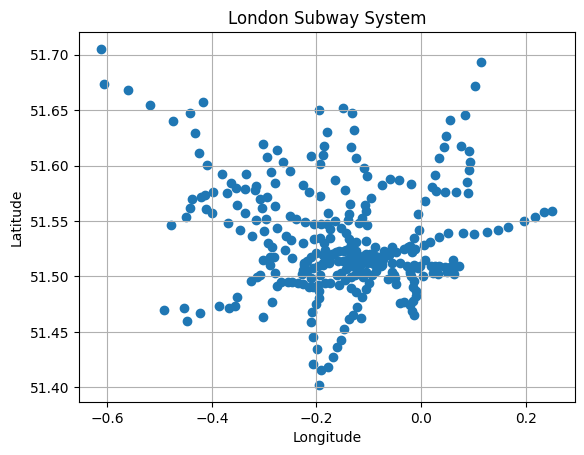

In [106]:
# plt.scatter(...)

# FIXME: soln to be removed
plt.scatter(long_london , lat_london)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("London Subway System")
plt.grid(True)

Now you may be wondering why we are plotting these values in longitude and latitude rather than physical distances in kilometres or miles. 

We can of course always convert these angular distances to physical distances keeping in mind that since our Earth is curved, two points with the same angular distances separated are physically much farther near the Equator than near the Poles. However, since the size of these cities are so small in comparison to the size of the Earth, we can almost treat them as physical distances. Besides, Boston and London are similar in latitudes ($\sim 40^{\circ}$ versus $\sim 50^{\circ}$), where a $1$ difference in Boston is $85$ km compared to $70$ km in London. 

There is another similarity between seeing data in this way and how astronomers see data. Often if we do not know the exact distances to galaxies, we pretend that the galaxies are points on the surface of some sphere, as we see the night sky. So you will see for very practical reasons astronomers may discuss distances between galaxies in terms of angles!

***Discussion:** Discuss with your neighbors what the similarities and the differences between Boston and London are. What qualitative features (or vibes) stick out to you?* 

For the ease of understanding the physical meaning of distances, let's convert our data to cartesian coordinates :

In [107]:
data_london = geo_to_cartesian(data_london[:, 0], data_london[:, 1])
data_boston = geo_to_cartesian(data_boston[:, 0], data_boston[:, 1])

# Also, let's get the x and y coordinates separately
x_london, y_london = data_london[:, 0], data_london[:, 1]
x_boston, y_boston = data_boston[:, 0], data_boston[:, 1]

## 2 - Pairs, pairs everywhere !

Now we come to the crux of our notebook. 

Remember that at the beginning we discussed that we need some tool to explain to us with numbers how close the stations are with respect to each other, and how those numbers can reflect the intuition we built by looking at the visualizations. 

The simplest thing we can do is calculate what the distance between two stations are. We can count this for every two pairs of stations and note down those values. But how do we find the distances between two points? This is where our old friend, Pythagoras, can come to help. If two points have coordinate values $(x_1, y_1)$ and $(x_2, y_2)$, then by the Pythagoras Theorem, what is the distance between those two points? 

**Complete the function below with the Pythagorean theorem to calculate the distance between two points.**

In [108]:
def distance_2d(x1,y1,x2,y2):
    """
    This mathematical function will take four numbers as inputs,
    x1, y1, x2 and y2 (in that order), and give us the distance 
    between (x1,y1) and (x2,y2)
    """
    
    # dist = ...
    
    #FIXME: soln to be removed
    dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    
    return dist 

### 2.1 - Counting the pairs

With the function ready, we can now **calculate distances between every two points**. We can use something called the `for` loop. If you are not familiar with it, simply follow the structure. The `for` loop is essentially going row-by-row to calculate the distances. 

In [109]:
num_stations_boston = data_boston.shape[0] # number of stations 
dist_bost = np.zeros((num_stations_boston, num_stations_boston)) # store the distance values in this array
    
for i in range(num_stations_boston):
    for j in range(num_stations_boston):
        
        #FIXME: students will write this line 
        dist_bost[i,j] = distance_2d(x_boston[i], y_boston[i], x_boston[j], y_boston[j])

You will notice something interesting here. Our code above treated stations `i` and `j` as a different calculation than stations `j` and `i`. However, the distance between these two stations is exactly the same! So, we are double-counting the distances, and we need to take care of it. 

If you are confused about this, think about it this way. If I have an orange and an apple 1 metre away from each other on a table, then does it matter if I ask *how far is the orange from the apple?* versus *how far is the apple from the orange?*

There is a clever trick we can use to get the number of unique distances. Don't worry about how this works. However, if you have seen some combinatorics in school, then you may read through the documentation of `numpy.triu_indices` and how it works. 

In [110]:
unique_pairs_boston = dist_bost[np.triu_indices(n=num_stations_boston,k=1)]

We can now take these distances and **visualize them with the help of a histogram**. Use `plt.hist(your_array, bins=20)` to plot the histogram.

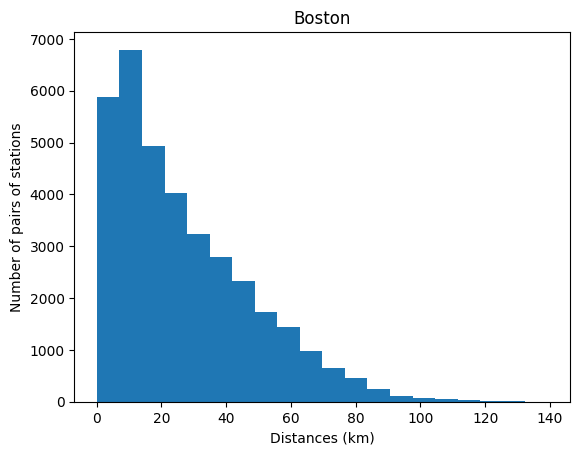

In [111]:
# plt.hist(..., bins=20)
# FIXME: soln to be removed
plt.hist(unique_pairs_boston, bins=20)

plt.ylabel("Number of pairs of stations")
plt.xlabel("Distances (km)")
plt.title("Boston");

As a reminder, a histogram is like a sifter that tells us how many points fall in a bucket. We will use it to understand what are the *typical* distances between two stations.

The width of each bar (called a "bin") tells us the range of distances that we are counting, while the height of each bar tells us how many pairs of stations are separated by that distance.

***Discussion**: What is the typical distance between two stations in Boston? What else do you notice about how stations are separated?*

<details>
<summary> <small>Open to see answers</small> </summary>

- The typical distance between two stations in Boston is around 20 km.
- The bigger the distance, the less pairs of stations are separated by that distance (at some point, we get out of the city !)
- Also, on a smaller distance, we also get less pairs of stations. This is because there is a minimum distance between two stations.

</details>

**To make our code more efficient, let's put everything we did above into a function** that takes in x and y arrays, bin values, and returns the histogram counts.

In [112]:
# def count_pairs(x, y, bin_edges):
#     num_stations = x.shape[0]
#     dist = np.zeros((...))
#     for i in range(...):
#         for j in range(...):
#             dist[i,j] = ...
#     unique_pairs = dist[np.triu_indices(n=num_stations,k=1)]
#     hist, _ = np.histogram(..., bins=bin_edges)
#     return hist

# FIXME: soln to be removed
def count_pairs(x, y, bin_edges):
    num_stations = x.shape[0]
    dist = np.zeros((num_stations, num_stations))
    for i in range(num_stations):
        for j in range(num_stations):
            dist[i,j] = distance_2d(x[i], y[i], x[j], y[j])
    unique_pairs = dist[np.triu_indices(n=num_stations,k=1)]
    hist, _ = np.histogram(unique_pairs, bins=bin_edges)
    return hist

But now, we can't just plot the histogram, as the function returns the counts !
We need to use `plt.step(bin_centers, counts)` to visualize the histogram (with `bin_centers` being the center of each bin). In our case, those bins centers are called "separation values".

**Use this function to calculate the histogram for Boston and London, and plot their histograms.**

> Tip: You can compare the two histograms by dividing the result of `count_pairs` by the sum of the results, so that the area under the histogram sums to 1.

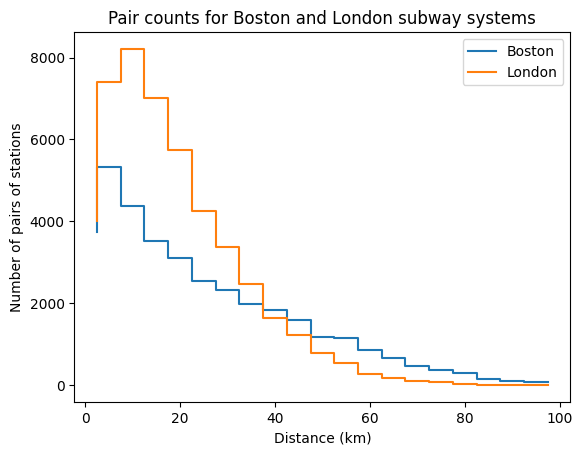

In [113]:
edges = np.linspace(0, 100, 21) # 20 bins between 0 and 100 km
sep = 0.5 * (edges[1:] + edges[:-1]) # bin centers
    
# boston_counts = ...
# london_counts = ...
# plt.plot(..., label='Boston')
# plt.plot(..., label='London')

#FIXME: soln to be removed
boston_counts = count_pairs(x_boston, y_boston, edges)
london_counts = count_pairs(x_london, y_london, edges)
plt.step(sep, boston_counts, label='Boston')
plt.step(sep, london_counts, label='London')

plt.xlabel("Distance (km)")
plt.ylabel("Number of pairs of stations")
plt.legend()
plt.title("Pair counts for Boston and London subway systems");

***Discussion**: What do you notice as the similarities and the dissimilarities between these two histograms? Which city supports a longer-haul subway system? If you look back at the visualization of the points, does that picture agree with what the histogram is showing?*

### 2.2 - Getting faster

Can we get more efficient in the way we count pairs? We saw that we were double-counting pairs. But we can do better. `pair_count_2d` is a function that does exactly what we did above, but much faster. 

The following cell contains a code that displays the time taken by our function versus the time taken by `pair_count_2d`. Is it faster ? What happens when you run the cell a second time ?

In [114]:
# NOTE: Do NOT run this cell with a large number of points, or it will take a long time to compute!

t0 = time.time()
boston_counts = count_pairs(data_boston[:, 0], data_boston[:, 1], edges)
t1 = time.time()
print(f"Time taken by count_pairs: {t1-t0:.5f} seconds")

t0 = time.time()
boston_counts_fast = pair_count_2d(data_boston, edges)
t1 = time.time()
print(f"Time taken by pair_count_2d: {t1-t0:.5f} seconds")

Time taken by count_pairs: 0.13275 seconds
Time taken by pair_count_2d: 0.00152 seconds


> This is called a "compiled" or "just-in-time compiled" function. It means that the function is converted to a lower-level language (like C or Fortran) before it is run, which makes it much faster than regular Python code. The first time you run it, it takes longer because it has to compile the function, but subsequent runs are much faster because the compiled version is reused.

(We will need this later, as we will be computing the pair counts of bigger datasets.)

### 2.3 - How typical is it from the average?

So by now you may have started to build some intuitions about how these cities cater their citizens. A city with a big suburb may need to have more stations far apart than a city that is more concentrated. While a histogram like above can help us compare between cities, we may want to use something that is more absolute and fundamental. This is where the concept of *randoms* come in to play.

Imagine that there is some fictional city where the number of blocks in each direction is the same, and the exact same number of people live in these blocks. How would you design a subway system for a city like that? 

Now imagine another fictional city, where $90 \%$ of its population lives within a $10 \times 10$ block space, with the rest population spreading out. Would you use the same subway system design for this city as the previous one? 

The first case represents the *ideal* case where there are no *forces* or other conditions at play. That means, in such a city, every citizen are *randomly* distributed without any preferences for blocks. The second case represents something that is more real. Perhaps this city has a river going through it and historically people have lived near the city. So the *force* of wanting to living close to the waterway would imply that the citizens are not *randomly* distributed in this city.

<a href="https://viewing.nyc/media/0518f95f8a49cc430e194d74c35f0a36/">
    <img src="../../images/manhattan_subway.jpg" alt="Manhattan Subway" height="700"/>
</a>

<h6>Source : <a href="https://viewing.nyc/thrillist-imagines-the-real-manhattan-subway-map/">Viewing NYC</a></h6>

*Here is a map of the Manhattan subway system. Can you guess from the map where is Central Park? And what part of the city has the densest population? What do you notice in the densest part compared to the rest of the network?*

What we often want to do in cosmology is measure how different our typical distances are between two points (galaxies) in the real Universe versus a hypothetical Universe in which the two points (galaxies) are distributed completely randomly. The fractional difference of the realistic second universe (or city) compared to the idealized first universe (or city) is what is known as the *two-point correlation function (2PCF)*. 

This ratio essentially answers: *Compared to randomly placing subway stations (or galaxies), how much more likely are subway stations (or galaxies) to be near each other at a distance of $X$?* Now if you are wondering why this is important, let's visualize a simple example. Imagine a universe in which no gravity exists. In that universe, no galaxies are being attracted to each other; they are spread out truly randomly. But in our universe, where gravity exists, we may see more galaxies closer to each other. Thus, this correlation function can tell us how important the force of gravity is at different scales. 

Let's start by generating random points in the same area as Boston and London.

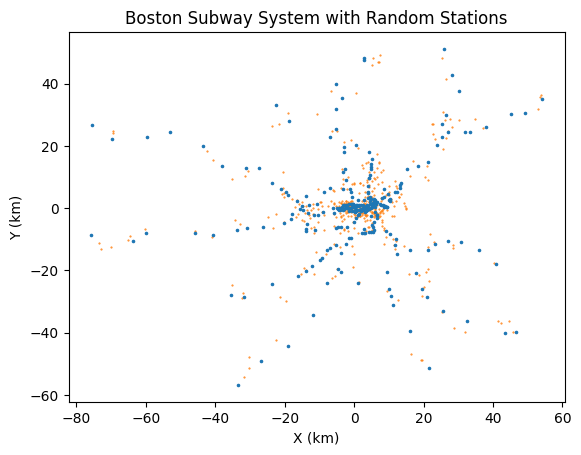

In [ ]:
randoms_boston = generate_randoms(data_boston, 100) # 100 times the number of data points
randoms_london = generate_randoms(data_london, 100)

plt.scatter(randoms_boston[:,0], randoms_boston[:,1], marker='.', s=1, color='C1', label='Randoms') 
plt.scatter(data_boston[:,0], data_boston[:,1], marker='.', s=10, color='C0', label='Data') # We plot data on top of randoms for better visibility
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.title("Boston Subway System with Random Stations");

Now, we want to repeat the histogram exercise and calculate the typical distance for these *random* cities that are like Boston and London. 

**Compute the pair counts for data and randoms using the `pair_count_2d` function, and plot the histograms with `plt.step(sep, counts)`.** 

Note that ideally the number of points used in the real map and the random map should be the same. But there are reasons to make the number of points in random higher than the real map as we have done here. In that case, we can correct for this, and we provide you with the `factor` number that you need to multiply the random counts with to get the correct answer. 

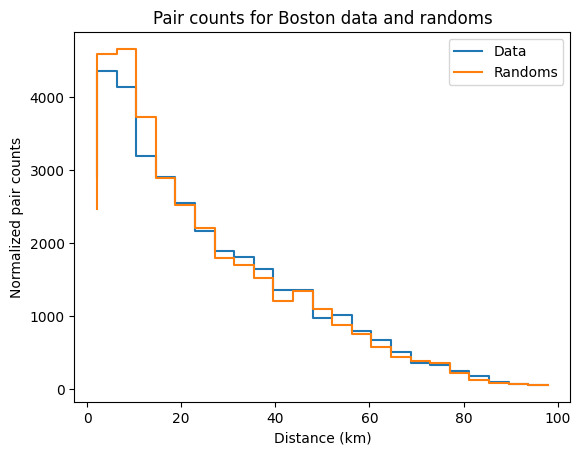

In [120]:
factor = len(data_boston)**2 / len(randoms_boston)**2

# count_data_boston = ...
# count_random_boston = ...
# plt.step(sep, ... , label='Data')
# plt.step(sep, ... , label='Randoms')

# FIXME: soln to be removed
count_data_boston = pair_count_2d(data_boston, edges)
count_random_boston = pair_count_2d(randoms_boston, edges)
plt.step(sep, count_data_boston, label='Data')
plt.step(sep, count_random_boston * factor, label='Randoms')

plt.xlabel("Distance (km)")
plt.ylabel("Normalized pair counts")
plt.legend()
plt.title("Pair counts for Boston data and randoms");

Do the histograms match ? In an ideal world, we would know where there is non-zero probability to find a metro station at any location of the city. Typically where there are people, buildings, etc., and where it is possible to build a station (e.g. not in the river). Also, we want our randoms to be contained in the shape of the city, not in the empty space around it.
Let's try something simpler: we place randoms in regions where there are stations.

**Re-run the two previous cells, but this time, generate randoms with `match_data=True` in the `generate_randoms` function.** How do the histograms look now ?

*If you want to, you can do the same exercise for London. How does it compare to Boston ?*

## 3 - Two-point correlation function

Now, we can compare our random distribution to our real distribution of subway stations. To do so, we introduce the "*Two-Point Correlation Function*" (or 2PCF/TPCF), denoted as $\xi(r)$. This function measures the *excess probability* of finding a pair of stations at a certain separation $r$ compared to a random distribution.

Physically, it is defined as: $\xi(r) = \langle \delta(x) . \delta(x+r) \rangle$, where $\delta(x)$ is the overdensity at position $x$. 
The physics behind this definition is a bit complex, so instead we will use a simpler estimator called the "Natural Estimator" (this is actually how we encode the TPCF in most of our codes).

The estimate of the two-point correlation function $\xi(r)$ at a separation $r$ is given by the formula:
$$\xi(r) = \frac{DD(r)}{RR(r)} - 1$$
where:
- $DD(r)$ is the number of pairs of data points (stations) separated by a distance $r$.
- $RR(r)$ is the number of pairs of random points separated by the same distance $r$.
- The subtraction of 1 ensures that if the data points are randomly distributed (i.e., $DD(r) = RR(r)$), then $\xi(r) = 0$.

**Try to encode the TPCF estimator in the function below**, that takes in the data and random points, and the separation edges.

In [117]:
# def tpcf(data_positions, random_positions, bin_edges):
#     DD = ...
#     RR = ...
    
#     nd = len(data_positions)
#     nr = len(random_positions)
#     factor = (nd*(nd-1)) / (nr*(nr-1))
#     RR = RR * factor
    
#     xi = ...
    
#     return xi


# FIXME: soln to be removed
def tpcf(data_positions, random_positions, bin_edges):
    DD = pair_count_2d(data_positions, bin_edges)
    RR = pair_count_2d(random_positions, bin_edges)
    
    nd = len(data_positions)
    nr = len(random_positions)
    factor = (nd*(nd-1)) / (nr*(nr-1))
    RR = RR * factor
    
    xi = DD / RR - 1.
    
    return xi

Now that we have a working TPCF function, let's compute and compare the TPCF for Boston and London.

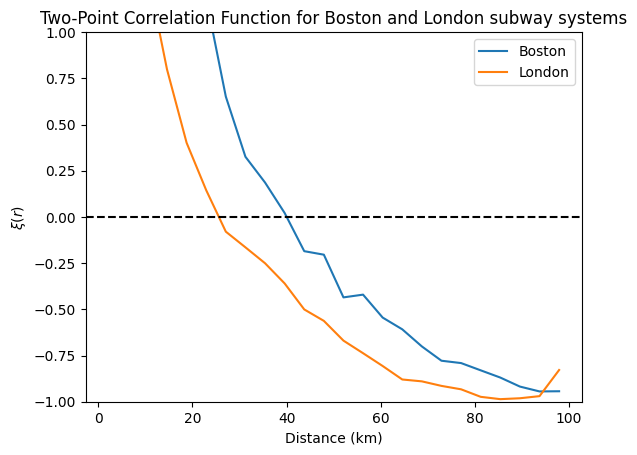

In [118]:
edges = np.linspace(0., 100, 25)
sep = (edges[:-1] + edges[1:]) / 2.

# tpcf_boston = ...
# tpcf_london = ...
# plt.plot(..., label='Boston')
# plt.plot(..., label='London')

# FIXME: soln to be removed
tpcf_boston = tpcf(data_boston, randoms_boston, edges)
tpcf_london = tpcf(data_london, randoms_london, edges)
plt.plot(sep, tpcf_boston, label='Boston')
plt.plot(sep, tpcf_london, label='London')

plt.ylim(-1, 1) 
plt.axhline(0, c = 'k', ls = '--')
plt.xlabel("Distance (km)")
plt.ylabel(r"$\xi(r)$")
plt.legend()
plt.title("Two-Point Correlation Function for Boston and London subway systems");

If the TPCF you get is noisy (i.e. it jumps up and down a lot), in this case it might be because we added too tight of a constraint on the random points (by using `match_data=True`), and we don't compare data to a truly random distribution. This is mostly due to our network being clustered in the city center, and having a lot of empty space in the suburbs (this is not always the case, as we will see in the next section).

**Run the cells above from 2.3 again, but this time with `match_data=False` in the `generate_randoms` function.**

***Discussion:** Remembering that 2PCF represents the amount of *excess* concentration (or clustering) of subway stations compared to randomly distributed stations, what can you say about Boston and London? What are their similarities and dissimilarities? Up to what distance do we see the cities have *more* subways than random, and when do they start becoming *less* than random? What could this scale tell us about what kind of city these are? Does this quantitative calculation match the intuition you built from looking at the data by eye?*

## 4 - A more complex network

Now that you understand how the TPCF works, let's ditch the Boston and London data, and focus on a map with a denser network - the birthplace of the metro system: We will explore subways (actually subways, trains, and bus stations) from the one and only City of Light, Paris 🥖. 

**From the Paris data, generate 20x randoms, compute the pairs counts and compute the TPCF.** Use separations between 0 and 100km, then between 0 and 1.5 km only.

> ❗To make it easier to understand, we keep only the stations in Paris city, and not the suburbs. We provide a mask to do so in the next cell, that you can apply to the data.

Start by converting `data_paris` to cartesian coordinates as we did for Boston and London (with the `geo_to_cartesian` function). Then, apply the mask to keep only the stations in Paris city (you can use `data_paris = data_paris[mask]`).

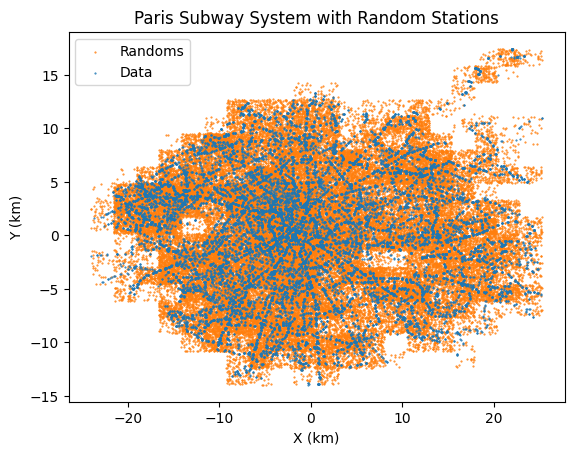

In [ ]:
data_paris = load_subway_data('paris')
mask = ~np.isin(data_paris[:, -1], [77, 78, 91, 95]) # keep only Paris intra-muros

# data_paris = ... # Apply mask here!
# randoms_paris = ...

# FIXME: soln to be removed
data_paris = geo_to_cartesian(data_paris[:, 0], data_paris[:, 1])[mask] # Apply mask here!
randoms_paris = generate_randoms(data_paris, 20, match_data=True)

# Let's visualize the data and randoms we generated
plt.scatter(randoms_paris[:, 0], randoms_paris[:, 1], marker='.', s=1, color='C1', label='Randoms')
plt.scatter(data_paris[:, 0], data_paris[:, 1], marker='.', s=1, color='C0', label='Data')
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.title("Paris Subway System with Random Stations")
plt.legend();

Then, set some edges with `np.linspace`, and get the pair counts with the `pair_count_2d` function.

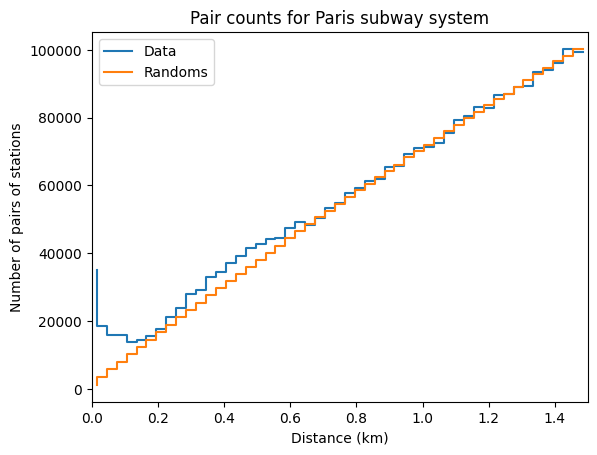

In [20]:
# edges = ...
# count_data_paris= ...
# count_random_paris = ...

# FIXME: soln to be removed
edges = np.linspace(0, 1.5, 51) # 50 bins between 0 and 1.5 km
count_data_paris = pair_count_2d(data_paris, edges)
count_random_paris = pair_count_2d(randoms_paris, edges)

factor = len(data_paris)**2 / len(randoms_paris)**2
sep = 0.5 * (edges[1:] + edges[:-1]) # bin centers

# plt.step(..., label='Data')
# plt.step(..., label='Randoms')

# FIXME: soln to be removed
plt.step(sep, count_data_paris, label='Data')
plt.step(sep, count_random_paris * factor, label='Randoms')

plt.legend()
plt.xlim(edges[0], edges[-1])
plt.xlabel("Distance (km)")
plt.ylabel("Number of pairs of stations")
plt.title("Pair counts for Paris subway system");

What do you notice in the histograms for the two different separation ranges ? Does something appears at small scales ?

Finally, compute the TPCF with the `tpcf` function you wrote earlier and plot it. We limit the y-axis between -0.1 and 0.5 with `plt.ylim(-0.1, 0.5)` for better visualization.

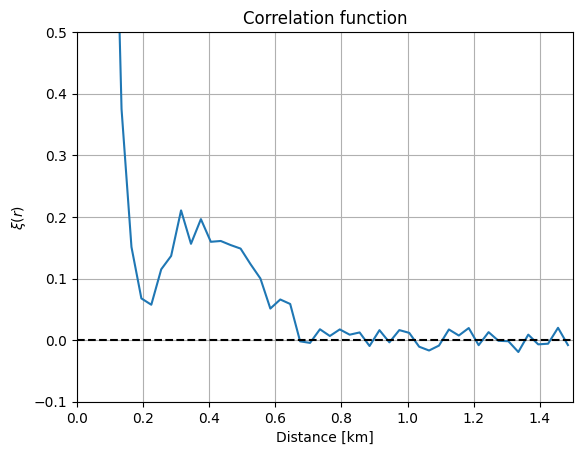

In [ ]:
# xi = ...
# plt.plot(sep, xi)

# FIXME: soln to be removed
xi = tpcf(data_paris, randoms_paris, edges)
plt.plot(sep, xi)

plt.ylim(-0.1, 0.5)
plt.xlim(edges[0], edges[-1])
plt.axhline(0., color='k', linestyle='--')
plt.xlabel('Distance [km]')
plt.ylabel(r'$\xi(r)$')
plt.title('Correlation function')
plt.grid(True);

***Discussion:** What do you notice about the TPCF for Paris ? What explains the steep rise at very small scales ? Why do you think there is a peak at small scales (around 0.5 km) ?* 

<details>
<summary> <small>Open to see answers</small> </summary>

- The steep rise at small scale is mostly due to stations hubs (e.g. Châtelet, Gare du Nord, etc.) where multiple lines intersect and stations are very close to each other.
- The peak at small scales (around 0.5 km) suggests that there is a significant concentration of stations within this distance, which may be a result of the city's historical development and the need for efficient public transportation in densely populated areas.
- We can easily deduce that this distance is the "ideal distance" between two stations in Paris, where transportation time $\lesssim$ walking time.
- ❗The peak is a "feature" of the TPCF, and is not due to noise. It is a real excess of pairs at this distance compared to random. We use a similar feature in cosmology, called the "BAO peak", to measure the expansion of the Universe (see the [dedicated notebook](BAO.ipynb) !).


</details>

## Conclusion

You now understand the basics of how the two-point correlation function works, and how to compute it from a given dataset. You also know how to interpret the results in a qualitative way.
The next step on your journey is to learn how these features translate to the galaxy catalogs we use in cosmology, and how we can use them to learn about the Universe.

Check out the notebook on the [BAO Peak](BAO.ipynb) to learn more about this !



***Aknowledgements***

*We would like to thank Arnaud De Mattia for allowing us to use snippets of his own Two-Point Correlation Function tutorial on Paris' Subway system.*

![](../../images/footer.png)

<details>
  <summary><h6>Code solutions, do not open if not allowed</h6></summary>

**Exercise 1 - Print the shape of the arrays**
```python
print(data_boston.shape)
print(data_london.shape)
```

**Exercise 2 - Print the arrays**
```python
print(data_boston)
print(data_london)
```

**Exercise 3 - Isolate longitude and latitude**
```python
# Isolate longitude and latitude
long_boston = data_boston[:,0]
lat_boston = data_boston[:,1]

long_london = data_london[:,0]
lat_london = data_london[:,1]
```

**Exercise 4 - Plot the stations (London or Boston)**
```python
plt.scatter(long_boston, lat_boston)
# or
plt.scatter(long_london, lat_london)
```

**Exercise 5 - Distance function**
```python
def distance_2d(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)
```

**Exercise 6 - Plot boston pairs histogram**
```python
plt.hist(unique_pairs_boston, bins=20)
```

**Exercise 7 - Count pairs function**
```python
def count_pairs(x, y, bin_edges):
    num_stations = x.shape[0]
    dist = np.zeros((num_stations, num_stations))
    for i in range(num_stations):
        for j in range(num_stations):
            dist[i,j] = distance_2d(x[i], y[i], x[j], y[j])
    unique_pairs = dist[np.triu_indices(n=num_stations,k=1)]
    hist, _ = np.histogram(unique_pairs, bins=bin_edges)
    return hist
```

**Exercise 8 - Plot histograms for Boston and London**
```python
boston_counts = count_pairs(x_boston, y_boston, edges)
london_counts = count_pairs(x_london, y_london, edges)
plt.step(sep, boston_counts, label='Boston')
plt.step(sep, london_counts, label='London')
```

**Exercise 9 - Plot histograms for Boston data and randoms**
```python
count_data_boston = pair_count_2d(data_boston, edges)
count_random_boston = pair_count_2d(randoms_boston, edges)
plt.step(sep, count_data_boston, label='Data')
plt.step(sep, count_random_boston * factor, label='Randoms')
```

**Exercise 10 - Define the TPCF function**
```python
def tpcf(data_positions, random_positions, bin_edges):
    DD = pair_count_2d(data_positions, bin_edges)
    RR = pair_count_2d(random_positions, bin_edges)
    
    nd = len(data_positions)
    nr = len(random_positions)
    factor = (nd*(nd-1)) / (nr*(nr-1))
    RR = RR * factor
    
    xi = DD / RR - 1.
    
    return xi
```

**Exercise 11 - Compute and plot TPCF for Boston and London**
```python
tpcf_boston = tpcf(data_boston, randoms_boston, edges)
tpcf_london = tpcf(data_london, randoms_london, edges)
plt.plot(sep, tpcf_boston, label='Boston')
plt.plot(sep, tpcf_london, label='London')
```

**Exercise 12 - Compute Paris'( data and randoms)**
```python
# Part 1 - Get the data and randoms
data_paris = geo_to_cartesian(data_paris[:, 0], data_paris[:, 1])[mask] # Apply mask here!
randoms_paris = generate_randoms(data_paris, 20, match_data=True)
# Part 2 - Get the pairs counts
edges = np.linspace(0, 1.5, 51) # 50 bins between 0 and 1.5 km
count_data_paris = pair_count_2d(data_paris, edges)
count_random_paris = pair_count_2d(randoms_paris, edges)
# Part 2 - Plot the pairs counts
plt.step(sep, count_data_paris, label='Data')
plt.step(sep, count_random_paris * factor, label='Randoms')
# Part 3 - Compute and plot the TPCF
xi = tpcf(data_paris, randoms_paris, edges)
plt.plot(sep, xi)
```